In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cedar_videos import *

%matplotlib inline

In [2]:
A_msmts = ["A" + str(i+1) for i in range(6)]

[ 0.203375    6.91434881]
[ 0.2563328   4.54456645]
[ 0.31828854 -1.59254586]
[ 0.29195496 -0.98605242]
[ 0.45665005 -7.14033078]
[  0.66787749 -11.79264307]


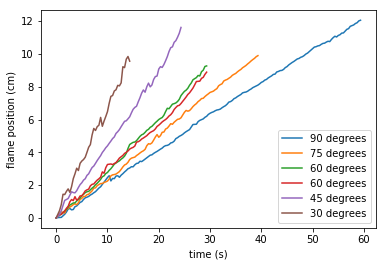

In [66]:
flame_velocities = {}

for m in A_msmts:
    data = np.load(os.path.join("data", m + ".npz"))
    t = data["flame_tracked_data"][:,0] / data["fps"]
    x = data["flame_tracked_data"][:,4]
    valid_points = (t > valid_time_ranges[m][0]) & (t < valid_time_ranges[m][1])
    start_point = np.flatnonzero(valid_points)[0]
    
    plt.plot(t[valid_points] - t[start_point], x[valid_points]-x[start_point], label="%.0f degrees" % angles[m])
    fr = np.polyfit(t[valid_points], x[valid_points], 1)
    flame_velocities[m] = fr[0]
    print(fr)

plt.legend()
plt.xlabel("time (s)")
plt.ylabel("flame position (cm)")
plt.savefig("plots/flame_traces.png", dpi=300)

In [67]:
repr(flame_velocities)

"{'A2': 0.25633279568768552, 'A4': 0.2919549600733029, 'A5': 0.45665004992767705, 'A3': 0.31828854025247422, 'A6': 0.66787749217954384, 'A1': 0.20337500111220155}"

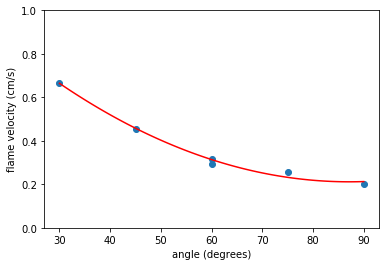

In [68]:
angs = []
vels = []

for m in A_msmts:
    angs.append(angles[m])
    vels.append(flame_velocities[m])
    
angs = np.array(angs)
vels = np.array(vels)

fr = np.polyfit(angs, vels, 2)
fp = np.poly1d(fr)

fr_exp = np.polyfit(angs, np.log(vels), 1)
fp_exp = lambda x: np.exp(np.poly1d(fr_exp)(x))

plt.scatter(angs, vels)
ang_lp = np.linspace(30, 90, 100)
plt.plot(ang_lp, fp(ang_lp), color="r")
#plt.plot(ang_lp, fp_exp(ang_lp), color="g")
plt.xlabel("angle (degrees)")
plt.ylabel("flame velocity (cm/s)")
plt.ylim(0,1)

plt.savefig("plots/flame_velocities.png", dpi=300)

[ 0.17948719]
[ 0.41409604]
[ 0.49130586]
[ 0.45091943]
[ 0.57951192]
[ 0.72428252]


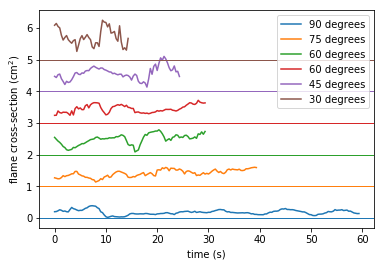

In [57]:
flame_velocities = {}

avg_flame_sizes = {}

i = 0
for m in A_msmts:
    data = np.load(os.path.join("data", m + ".npz"))
    t = data["flame_tracked_data"][:,0] / data["fps"]
    x = data["flame_tracked_data"][:,5]
    valid_points = (t > valid_time_ranges[m][0]) & (t < valid_time_ranges[m][1])
    start_point = np.flatnonzero(valid_points)[0]
    
    avg_flame_sizes[m] = np.mean(x[valid_points])
    
    p, = plt.plot(t[valid_points] - t[start_point], x[valid_points] + i, label="%.0f degrees" % angles[m])
    plt.axhline(y=i, color=p.get_color(), linewidth=1)
    fr = np.polyfit(t[valid_points], x[valid_points], 0.5)
    flame_velocities[m] = fr[0]
    print(fr)
    i += 1

plt.legend()
plt.xlabel("time (s)")
plt.ylabel("flame cross-section (cm$^2$)")

plt.savefig("plots/flame_size_trace.png", dpi=300)

In [59]:
repr(avg_flame_sizes)

"{'A2': 0.41409603665040245, 'A4': 0.45091942887667597, 'A5': 0.57951191847832972, 'A3': 0.49130585897178669, 'A6': 0.72428252217023925, 'A1': 0.17948718800756583}"

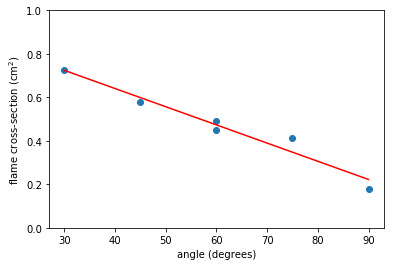

In [62]:
angs = []
sizes = []

for m in A_msmts:
    angs.append(angles[m])
    sizes.append(avg_flame_sizes[m])
    
angs = np.array(angs)
sizes = np.array(sizes)

fr = np.polyfit(angs, sizes, 1)
fp = np.poly1d(fr)

# fr_exp = np.polyfit(angs, np.log(vels), 1)
# fp_exp = lambda x: np.exp(np.poly1d(fr_exp)(x))

plt.scatter(angs, sizes)
ang_lp = np.linspace(30, 90, 100)
plt.plot(ang_lp, fp(ang_lp), color="r")
#plt.plot(ang_lp, fp_exp(ang_lp), color="g")
plt.xlabel("angle (degrees)")
plt.ylabel("flame cross-section (cm$^2$)")
plt.ylim(0,1)

plt.savefig("plots/flame_sizes.png", dpi=300)